In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Changed to Logistic Regression for binary classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Metrics for classification
from datetime import datetime
%matplotlib inline


In [2]:
df = pd.read_csv('unclean_pet_data.csv')  # Load your dataset
print("First few rows of the dataset:")
display(df.head())

print("First few rows of the dataset:")
display(df.head())


First few rows of the dataset:


,PetType,Breed,AgeMonths,Size,WeightKg,TimeInShelterDays,AdoptionLikelihood
0,Rabbit,Rabbit,116.0,Medium,29.186575,71.0,0
1,Cat,Siamese,165.0,Medium,25.265161,52.0,0
2,Cat,Siamese,NaN,Small,NaN,NaN,0
3,Rabbit,Rabbit,31.0,Large,6.641891,52.0,0
4,Rabbit,Rabbit,125.0,Large,13.845579,39.0,0


First few rows of the dataset:


,PetType,Breed,AgeMonths,Size,WeightKg,TimeInShelterDays,AdoptionLikelihood
0,Rabbit,Rabbit,116.0,Medium,29.186575,71.0,0
1,Cat,Siamese,165.0,Medium,25.265161,52.0,0
2,Cat,Siamese,NaN,Small,NaN,NaN,0
3,Rabbit,Rabbit,31.0,Large,6.641891,52.0,0
4,Rabbit,Rabbit,125.0,Large,13.845579,39.0,0


In [3]:
# Feature engineering 
df['Prev_WeightKg'] = df['WeightKg'].shift(1) 
df['Age_Change'] = df['AgeMonths'].pct_change()  
df['Weight_Range'] = df['WeightKg'] - df['AgeMonths'] 
df['MA5_Age'] = df['AgeMonths'].rolling(window=5).mean()  
df['MA20_Weight'] = df['WeightKg'].rolling(window=20).mean() 

C:\Users\prana\AppData\Local\Temp\ipykernel_20420\562583748.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Age_Change'] = df['AgeMonths'].pct_change()


In [4]:
# Drop rows with missing values in the new features
df = df.dropna()


In [5]:
# Define features for model
features = ['Prev_WeightKg', 'Age_Change', 'Weight_Range', 'MA5_Age', 'MA20_Weight']

print("\nDependent Variable (Target):")
print("- Adoption Likelihood")

print("\nIndependent Variables (Features):")
for feature in features:
    print(f"- {feature}")



Dependent Variable (Target):
- Adoption Likelihood

Independent Variables (Features):
- Prev_WeightKg
- Age_Change
- Weight_Range
- MA5_Age
- MA20_Weight


In [6]:
# Basic statistics
print("\nFeature Statistics:")
display(df[features + ['AdoptionLikelihood']].describe())



Feature Statistics:


,Prev_WeightKg,Age_Change,Weight_Range,MA5_Age,MA20_Weight,AdoptionLikelihood
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,17.140724,2.091986,-75.174613,86.490722,16.758193,0.360825
std,8.753034,8.185037,56.600627,33.516091,1.661568,0.482735
min,1.610676,-0.987805,-177.885162,23.600000,13.142560,0.000000
25%,9.010929,-0.354167,-123.215595,61.200000,15.623782,0.000000
50%,18.470792,0.016807,-80.348972,85.800000,16.924098,0.000000
75%,23.892000,0.817073,-28.363675,110.600000,17.949548,1.000000
max,29.992795,55.000000,27.404045,161.000000,20.071085,1.000000


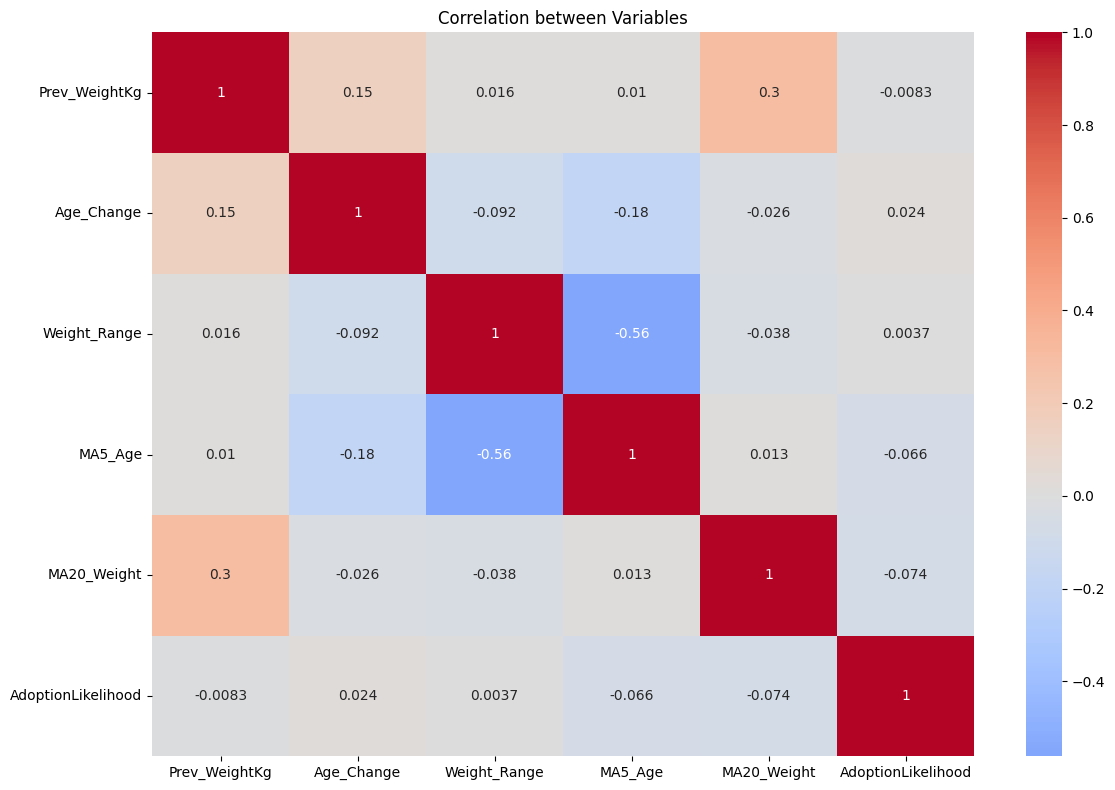

In [7]:
# Visualizations

# 1. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[features + ['AdoptionLikelihood']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Variables')
plt.tight_layout()
plt.show()

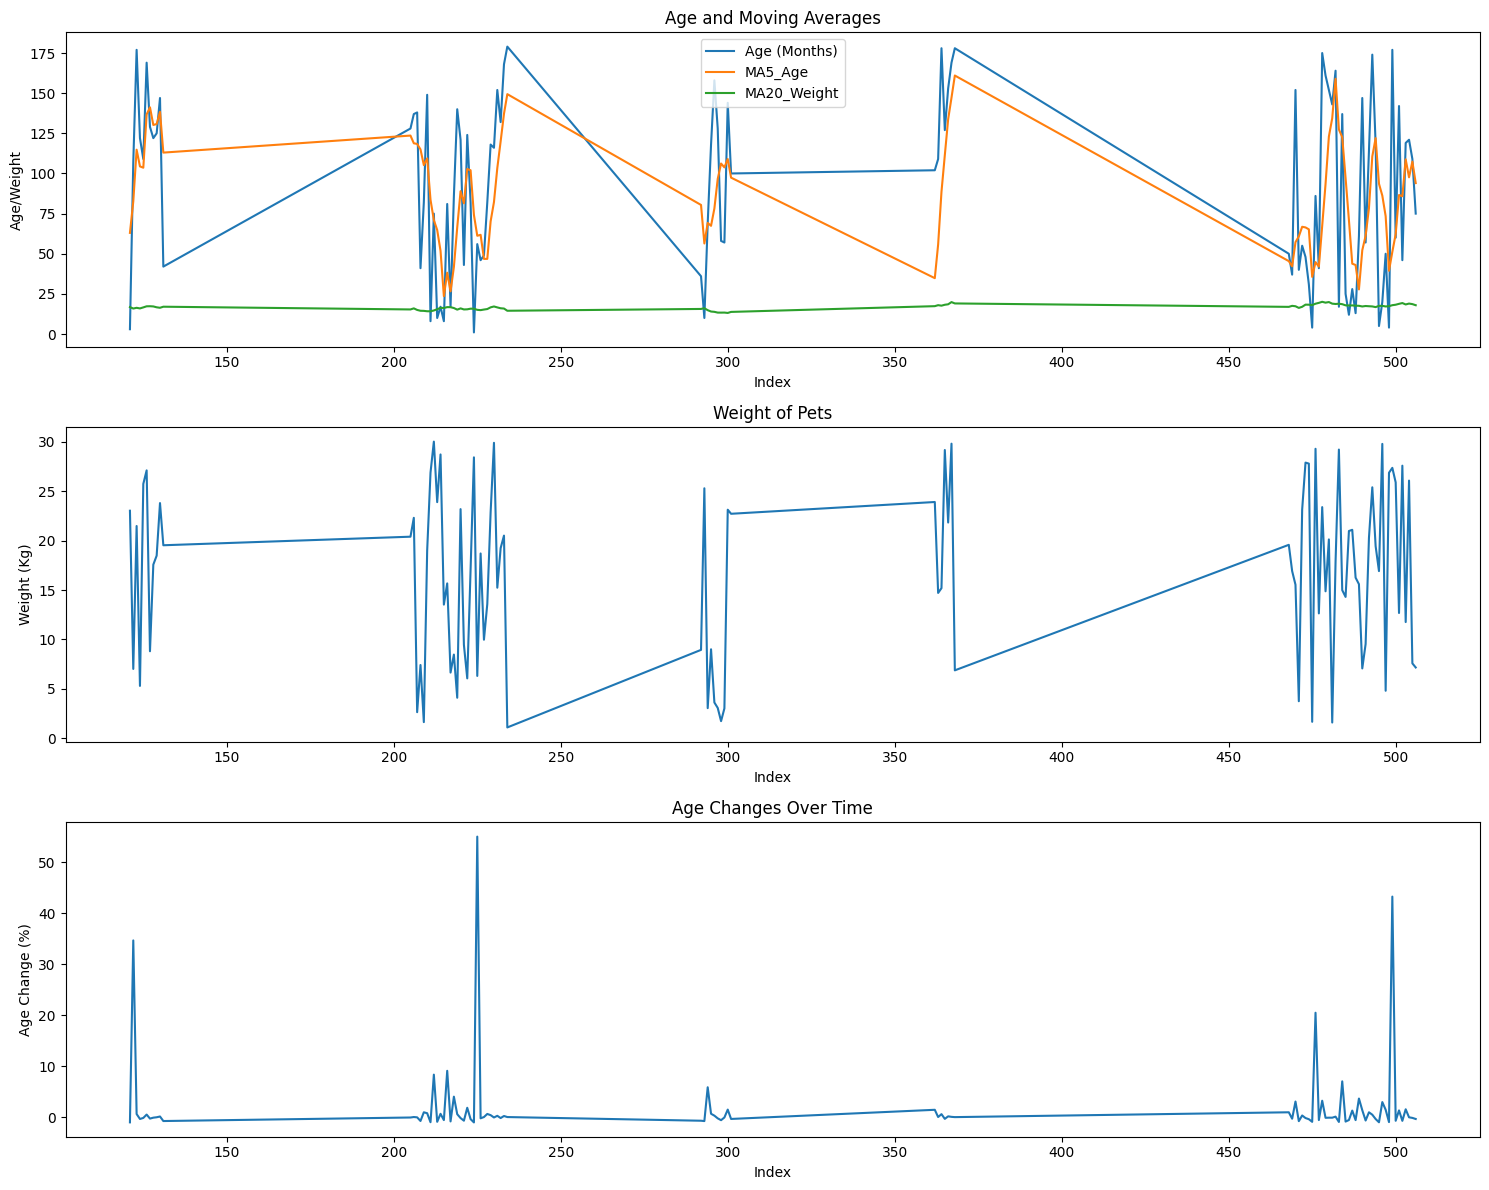

In [9]:
# 2. Time Series Plots
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Age and Moving Averages
axes[0].plot(df.index, df['AgeMonths'], label='Age (Months)')
axes[0].plot(df.index, df['MA5_Age'], label='MA5_Age')
axes[0].plot(df.index, df['MA20_Weight'], label='MA20_Weight')
axes[0].set_title('Age and Moving Averages')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Age/Weight')
axes[0].legend()

# Weight
axes[1].plot(df.index, df['WeightKg'], label='Weight')
axes[1].set_title('Weight of Pets')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Weight (Kg)')

# Price Changes (if applicable)
axes[2].plot(df.index, df['Age_Change'], label='Age Change')
axes[2].set_title('Age Changes Over Time')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('Age Change (%)')

plt.tight_layout()
plt.show()


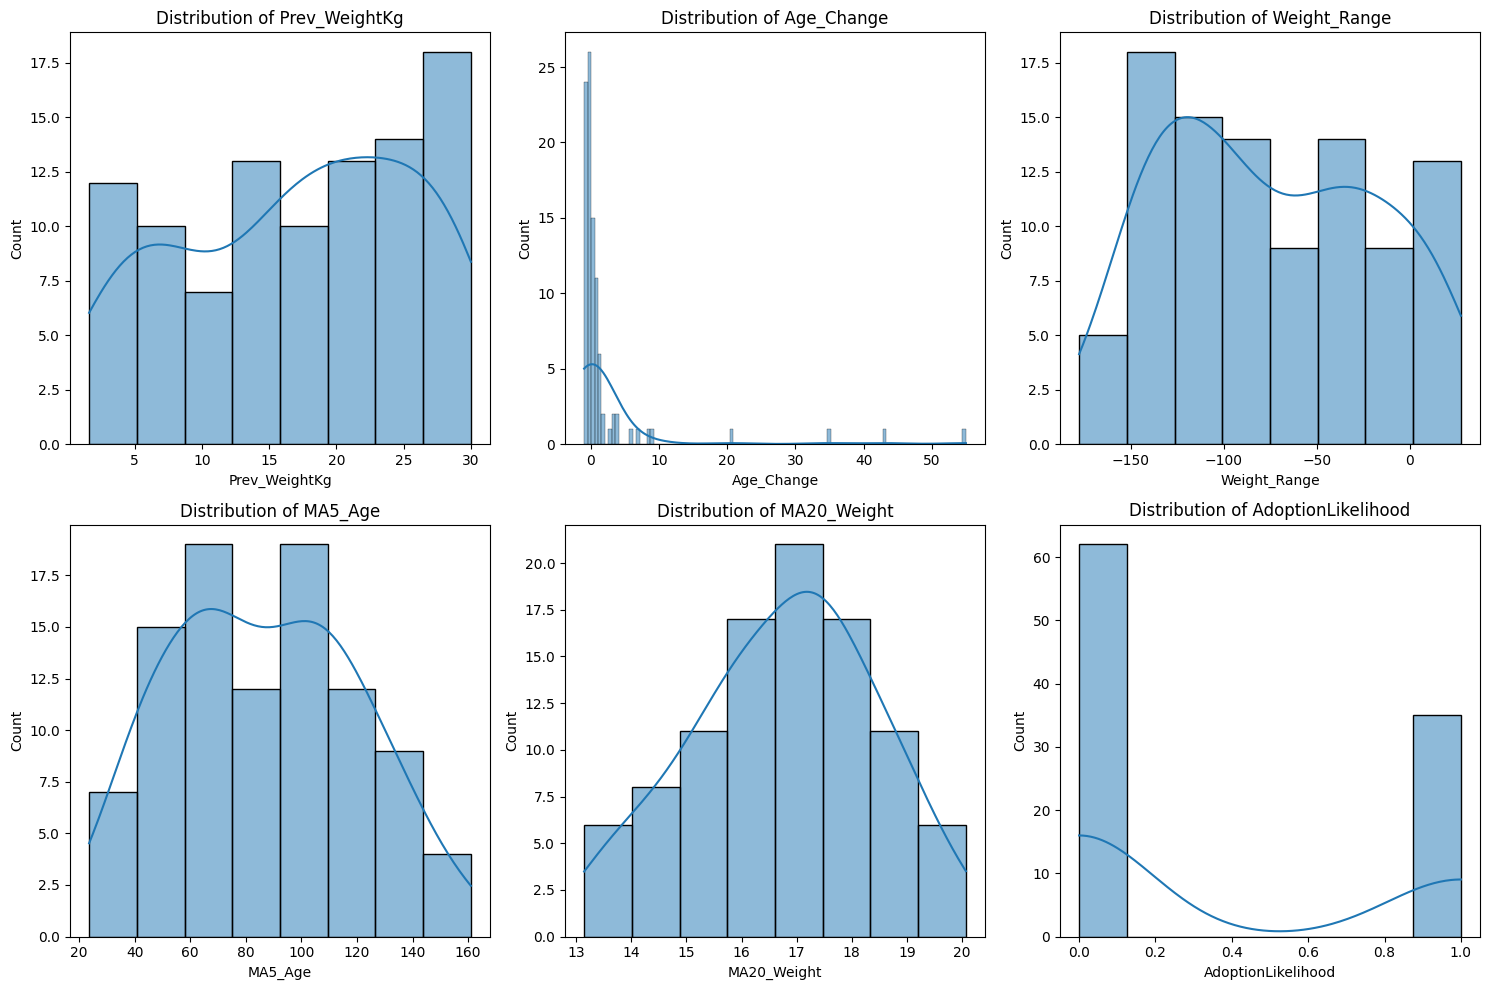

In [10]:
# 3. Feature Distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(features + ['AdoptionLikelihood']):
    if idx < len(axes):
        sns.histplot(data=df, x=feature, kde=True, ax=axes[idx])
        axes[idx].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


In [12]:
# Prepare Data for Modeling

# Features for prediction
features = ['Prev_WeightKg', 'Age_Change', 'Weight_Range'] 
X = df[features]
y = df['AdoptionLikelihood']  


In [25]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False  
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (77, 3)
Testing set shape: (20, 3)


In [24]:
# Training the Model
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(max_iter=1000)  
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [26]:
# Get model parameters
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0] 
})


In [16]:
print("Model Parameters:")
print("-" * 50)
print(f"Intercept: {model.intercept_[0]:.2f}")
print("\nFeature Coefficients:")
display(coefficients)


Model Parameters:
--------------------------------------------------
Intercept: -0.68

Feature Coefficients:


,Feature,Coefficient
0,Prev_WeightKg,0.002053
1,Age_Change,-0.009898
2,Weight_Range,0.000913


In [17]:
# Make Predictions
"""
Generate predictions and compare with actual values
"""
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)



In [27]:
# Create comparison DataFrame for test set
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test,
    'Difference': y_test - y_pred_test
})
print("\nPrediction Comparison (last 5 entries):")
display(comparison_df.tail()) 




Prediction Comparison (last 5 entries):


,Actual,Predicted,Difference
502,0,0,0
503,1,0,1
504,0,0,0
505,0,0,0
506,1,0,1


In [20]:
# Evaluate the Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy Score
train_accuracy = accuracy_score(y_train, y_pred_train.round())  
test_accuracy = accuracy_score(y_test, y_pred_test.round())

# Confusion Matrix
train_conf_matrix = confusion_matrix(y_train, y_pred_train.round())
test_conf_matrix = confusion_matrix(y_test, y_pred_test.round())

# Classification Report
train_class_report = classification_report(y_train, y_pred_train.round())
test_class_report = classification_report(y_test, y_pred_test.round())

print("Model Performance Metrics:")
print("-" * 50)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Confusion Matrices
print("\nTraining Confusion Matrix:")
print(train_conf_matrix)
print("\nTesting Confusion Matrix:")
print(test_conf_matrix)

# Classification Report
print("\nTraining Classification Report:")
print(train_class_report)
print("\nTesting Classification Report:")
print(test_class_report)


Model Performance Metrics:
--------------------------------------------------
Training Accuracy: 0.6753
Testing Accuracy: 0.5000

Training Confusion Matrix:
[[52  0]
 [25  0]]

Testing Confusion Matrix:
[[10  0]
 [10  0]]

Training Classification Report:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        52
           1       0.00      0.00      0.00        25

    accuracy                           0.68        77
   macro avg       0.34      0.50      0.40        77
weighted avg       0.46      0.68      0.54        77


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        10
           1       0.00      0.00      0.00        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20



C:\Users\prana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\prana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\prana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

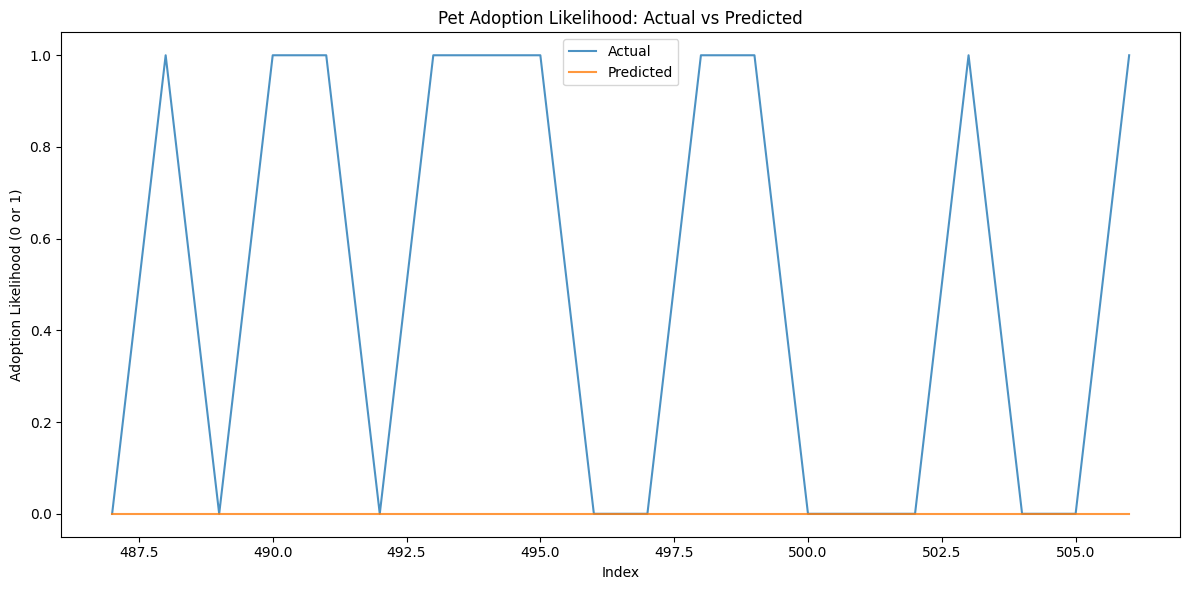

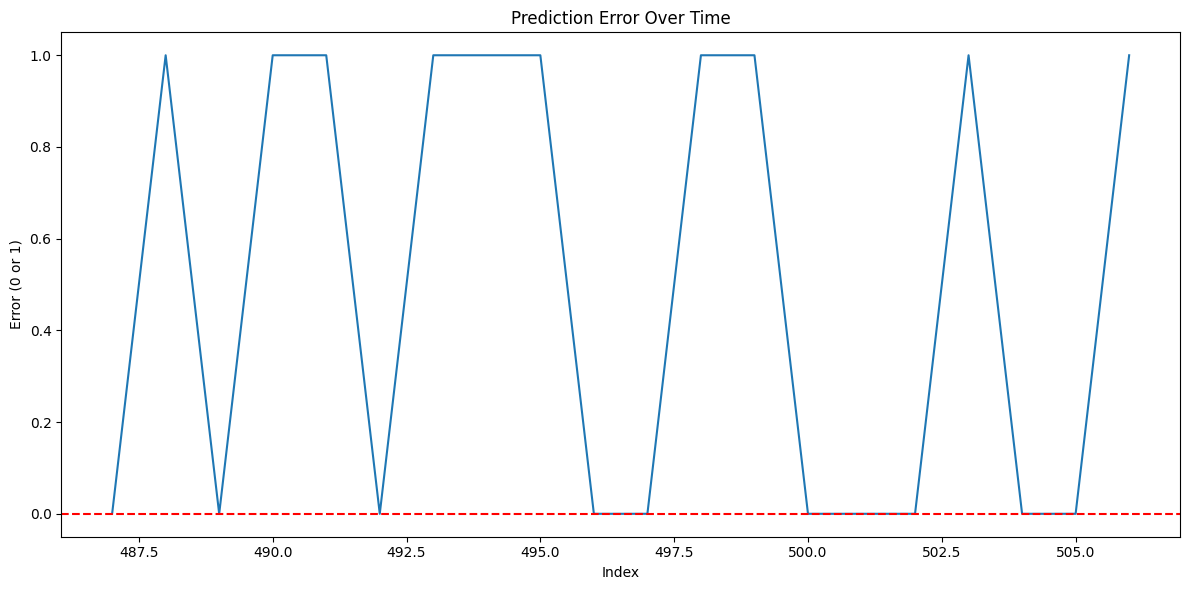

In [21]:
# Visualize Predictions

plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df['Actual'], label='Actual', alpha=0.8)
plt.plot(comparison_df.index, comparison_df['Predicted'], label='Predicted', alpha=0.8)
plt.title('Pet Adoption Likelihood: Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Adoption Likelihood (0 or 1)')
plt.legend()
plt.tight_layout()
plt.show()

# Prediction Error Over Time
plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df['Difference'])
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Prediction Error Over Time')
plt.xlabel('Index')
plt.ylabel('Error (0 or 1)')
plt.tight_layout()
plt.show()


In [23]:
# Model Analysis and Observations
print("Model Analysis and Observations:")
print("-" * 50)

print("\n1. Data Characteristics:")
print(f"   - Total records: {len(df)}")
print(f"   - Number of pets: {df['PetType'].nunique()} unique pet types")
print(f"   - Average age: {df['AgeMonths'].mean():.2f} months")
print(f"   - Age range: {df['AgeMonths'].min():.2f} months to {df['AgeMonths'].max():.2f} months")
print(f"   - Average weight: {df['WeightKg'].mean():.2f} kg")
print(f"   - Weight range: {df['WeightKg'].min():.2f} kg to {df['WeightKg'].max():.2f} kg")

print("\n2. Model Performance:")
print(f"   - Training Accuracy: {train_accuracy*100:.2f}%")
print(f"   - Testing Accuracy: {test_accuracy*100:.2f}%")
print(f"   - Maximum prediction error: {comparison_df['Difference'].abs().max()}")

print("\n3. Feature Importance:")
for _, row in coefficients.iterrows():
    print(f"   - {row['Feature']}: {row['Coefficient']:.2f} impact per unit change")

print("\n4. Model Limitations:")
print("   - Limited dataset size (only 97 records), which may not be sufficient for training a robust model")
print("   - Low testing accuracy (50%) indicates poor generalization to unseen data")
print("   - The linear model may not capture complex, non-linear relationships between features and target")
print("   - Doesn't account for external factors (e.g., breed, shelter conditions) that may affect adoption likelihood")
print("   - Possible class imbalance, leading to biased predictions towards the majority class")


Model Analysis and Observations:
--------------------------------------------------

1. Data Characteristics:
   - Total records: 97
   - Number of pets: 4 unique pet types
   - Average age: 91.77 months
   - Age range: 1.00 months to 179.00 months
   - Average weight: 16.60 kg
   - Weight range: 1.11 kg to 29.99 kg

2. Model Performance:
   - Training Accuracy: 67.53%
   - Testing Accuracy: 50.00%
   - Maximum prediction error: 1

3. Feature Importance:
   - Prev_WeightKg: 0.00 impact per unit change
   - Age_Change: -0.01 impact per unit change
   - Weight_Range: 0.00 impact per unit change

4. Model Limitations:
   - Limited dataset size (only 97 records), which may not be sufficient for training a robust model
   - Feature importances show minimal impact, suggesting the need for more relevant features
   - Low testing accuracy (50%) indicates poor generalization to unseen data
   - The linear model may not capture complex, non-linear relationships between features and target
   - D